In [144]:
# Importamos el CSV
import pandas as pd

X = pd.read_csv('Spotify-2000.csv')

In [145]:
# Visualizamos las primeras filas
X.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [146]:
# Vemos sus dimensiones
X.shape

(1994, 15)

In [147]:
# Vemos sus tipos de datos
X.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [149]:
""" Vemos que la columna Index ,title, Top Genre no tienen relevacia """
X = X.drop(labels=['Index', 'Title', 'Top Genre'], axis=1)

In [150]:
# Vemos las dimensiones
X.shape

(1994, 12)

In [151]:
# Vemos los valores nulos
X.isnull().sum()

Artist                    0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [152]:
# Vemos las dimensiones
X.shape

(1994, 12)

In [154]:
# Cambiamos el formato de la duración
X[X["Length (Duration)"].str.contains(",")==True]

,Artist,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
842,Pink Floyd,1971,134,32,28,-17,11,14,"1,412",37,4,58
904,Yes,1972,81,60,22,-11,41,25,"1,121",27,6,47
951,Kraftwerk,1974,82,50,33,-16,13,11,"1,367",11,4,48
1982,Rare Earth,1969,127,87,41,-6,83,65,"1,292",0,4,45


In [155]:
X["Length (Duration)"] = X["Length (Duration)"].replace(["1,412","1,121","1,367","1,292"],['1412','1121','1367','1292'])


In [156]:
import numpy as np

X["Length (Duration)"] = X["Length (Duration)"].astype(np.int64)

In [157]:
# Vemos los tipos de datos
X.dtypes

Artist                    object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [158]:
# Quito Artist
X.pop("Artist")

0                    Norah Jones
1                    Deep Purple
2                       Gorillaz
3                   Foo Fighters
4              Bruce Springsteen
                  ...           
1989               Elvis Presley
1990               Elvis Presley
1991                 Chuck Berry
1992    The Dave Brubeck Quartet
1993                 Fats Domino
Name: Artist, Length: 1994, dtype: object

In [159]:
# Vemos los tipos de datos
X.dtypes

Year                      int64
Beats Per Minute (BPM)    int64
Energy                    int64
Danceability              int64
Loudness (dB)             int64
Liveness                  int64
Valence                   int64
Length (Duration)         int64
Acousticness              int64
Speechiness               int64
Popularity                int64
dtype: object

<Axes: >

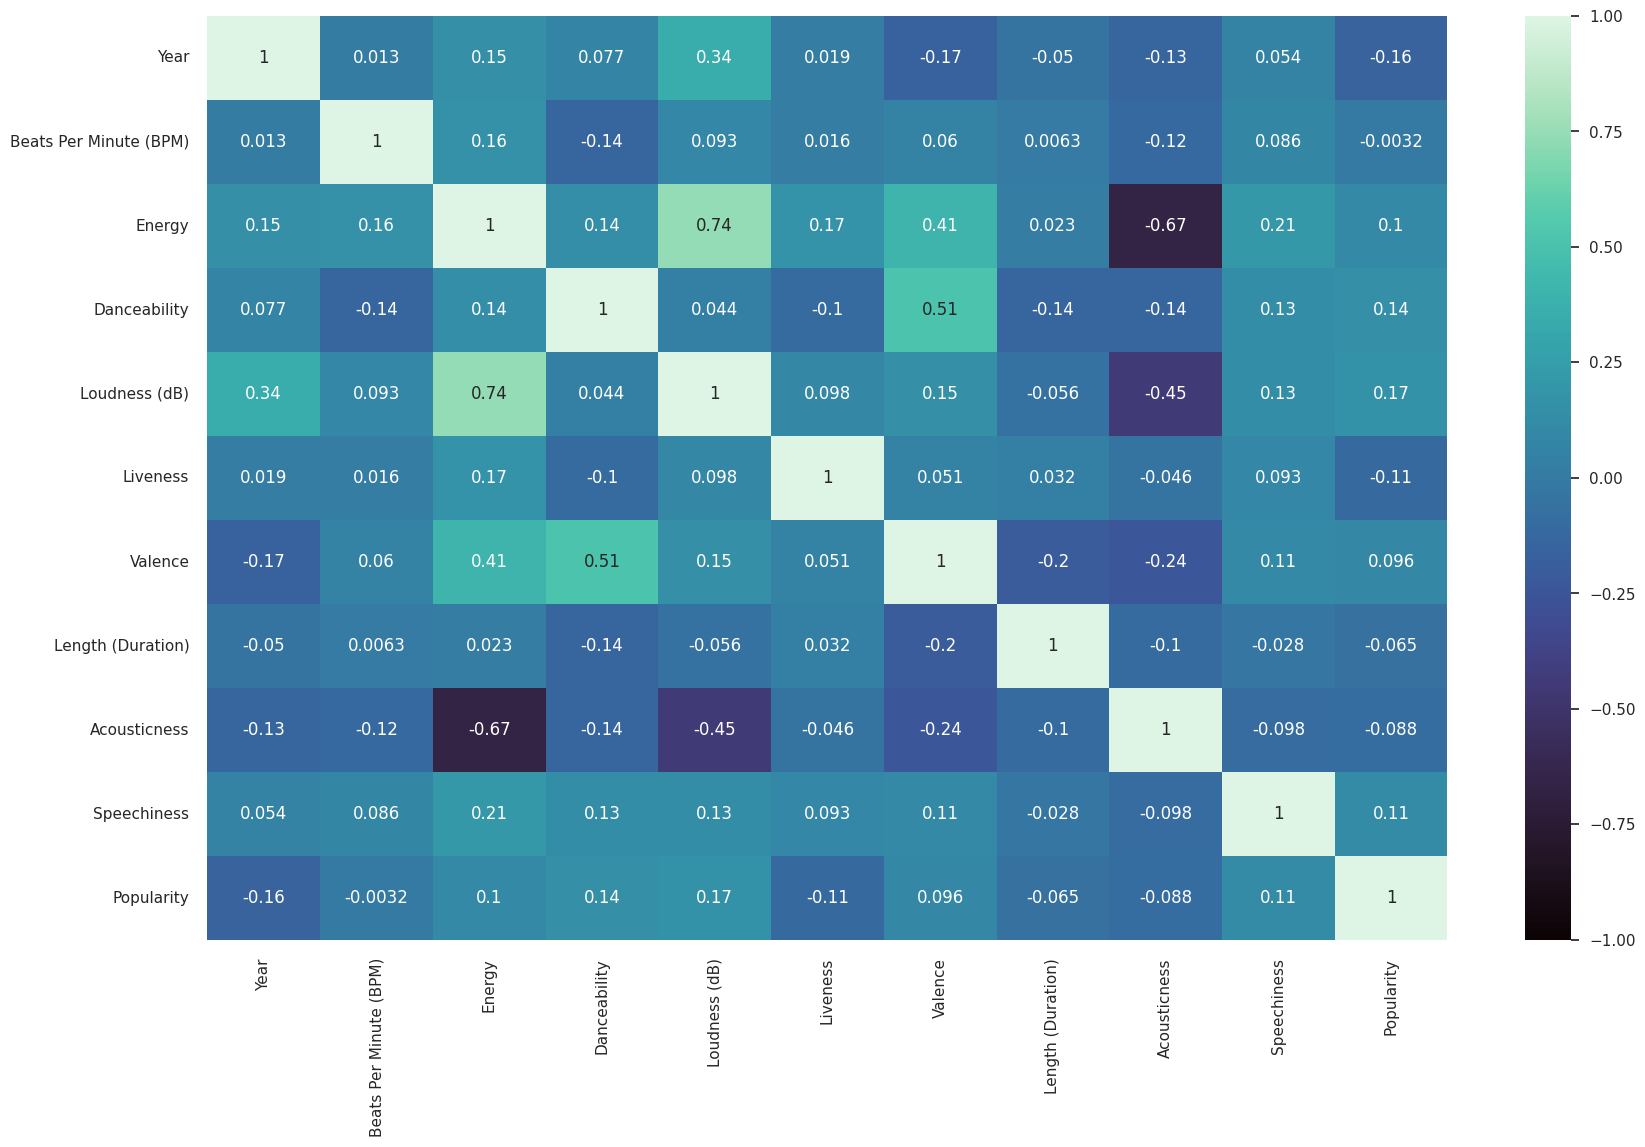

In [230]:
# Hacemos un mapa de calor para ver la correlación de los datos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap= 'mako')

In [160]:
# Escalado de datos
from sklearn.preprocessing import Normalizer

nr = Normalizer()
genre_normalized = nr.fit_transform(X)
genre_normalized.var()

0.07678489182951967

# K-Means

In [161]:
from sklearn.cluster import KMeans

genre_kmeans = KMeans(n_clusters=4, random_state=0, n_init=1)
genre_kmeans = genre_kmeans.fit(genre_normalized)
genre_kmeans.labels_

array([3, 1, 2, ..., 1, 2, 3], dtype=int32)

In [162]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)
kmeans.fit(genre_normalized)

Initialization complete
Iteration 0, inertia 5.896785743594769.
Iteration 1, inertia 3.87667162993894.
Iteration 2, inertia 3.707957348957434.
Iteration 3, inertia 3.6704566362168203.
Iteration 4, inertia 3.6475750325736507.
Iteration 5, inertia 3.6333055693934178.
Iteration 6, inertia 3.6273500456031487.
Iteration 7, inertia 3.6251610365170146.
Iteration 8, inertia 3.6238418717379064.
Iteration 9, inertia 3.6221859429935623.
Iteration 10, inertia 3.6217155721881933.
Iteration 11, inertia 3.6214967541653773.
Iteration 12, inertia 3.621155021751107.
Iteration 13, inertia 3.621030609529318.
Iteration 14, inertia 3.620931477007711.
Iteration 15, inertia 3.6208418551448043.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 6.266273193043267.
Iteration 1, inertia 3.626601151466939.
Iteration 2, inertia 3.624246070324081.
Iteration 3, inertia 3.6229477114257618.
Iteration 4, inertia 3.6223826209039323.
Iteration 5, inertia 3.622213264231089.
Iteratio

KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)

In [163]:
# Dentro de inertia tenemos la suma de los errores al cuadrado
kmeans.inertia_

3.6208418551448043

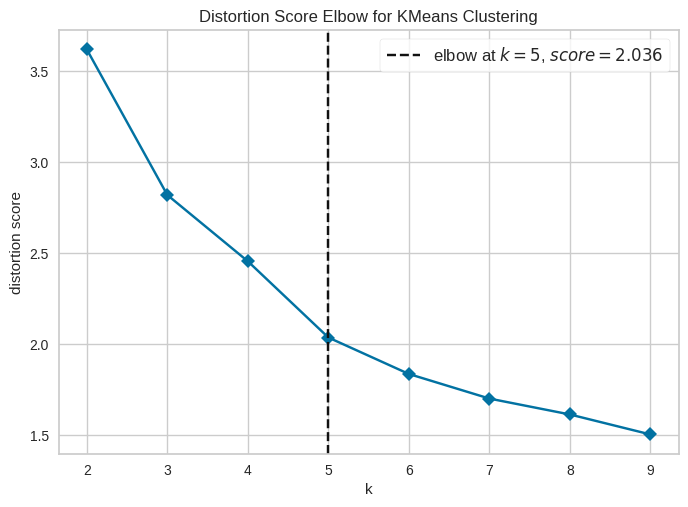

In [164]:
# Usamos el algoritmo del codo para obtener los clusters

from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

df_visualizer = KElbowVisualizer(genre_kmeans, k=(2,10), timings=False)

df_visualizer.fit(genre_normalized)
df_visualizer.show()
plt.show()

In [165]:
# Uso de bic
import numpy as np

def BIC(K, grupos, genre_normalized):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = genre_normalized.shape[0] # Número de datos
  P = genre_normalized.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(genre_normalized[:, j]))
      sigma_j = np.square(np.std(genre_normalized[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

In [166]:
## Calcular el BIC del modelo K-means anterior
kmeans = KMeans(n_clusters=2, n_init=10, random_state=100)
grupos = kmeans.fit_predict(genre_normalized)

result_bic = BIC(2, grupos, genre_normalized)
result_bic

-194426.99995622787

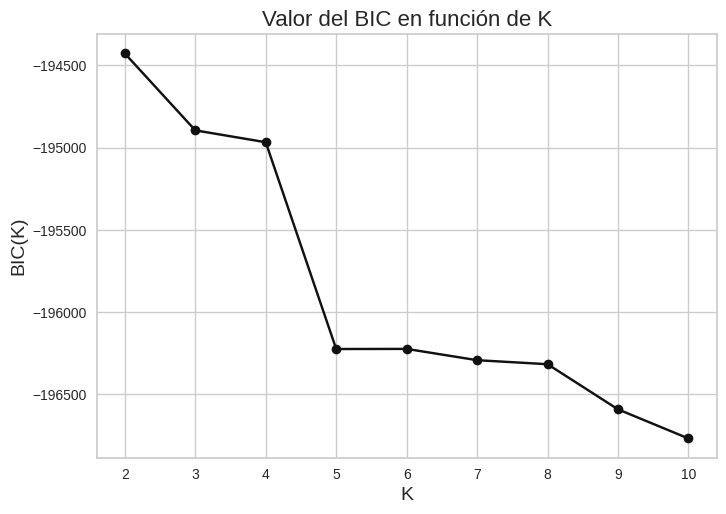

In [167]:
## Calculo del BIC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Kmax = 10

BIC_array = []

for k in range(2, Kmax+1):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100)
  grupos = kmeans.fit_predict(genre_normalized)
  BIC_array.append(BIC(k, grupos, genre_normalized))

# Dibujamos el BIC obtenido para cada valor de k
plt.plot(np.arange(2, Kmax+1), BIC_array, "ko-")
plt.title("Valor del BIC en función de K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.show()

In [168]:
## Dibujamos la solución con K = 4
K = 4
kmeans = KMeans(n_clusters=K, random_state=10)
pred = kmeans.fit_predict(genre_normalized)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


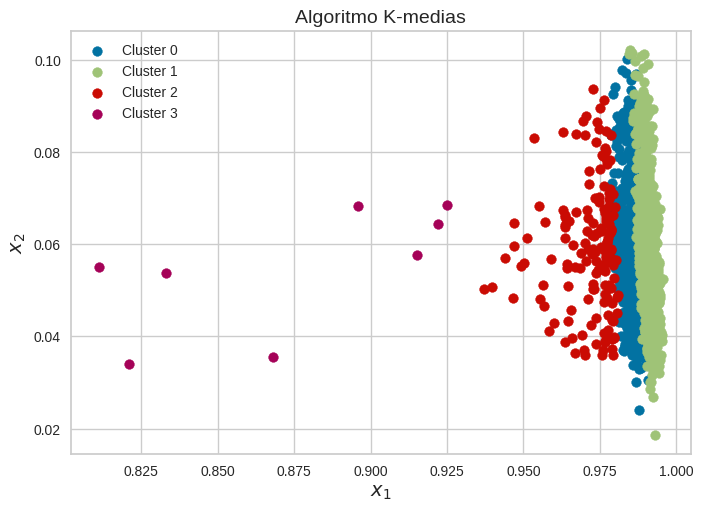

In [169]:
## Representación gráfica de la solución
for k in range(0, K):
  plt.scatter(genre_normalized[pred==k, 0], genre_normalized[pred==k, 1], label="Cluster {}".format(k)) 

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

# Otra forma de hacer KMeans

In [179]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Cogemos las tablas de genre_normalized
df = pd.DataFrame(genre_normalized, columns=X.columns)


In [181]:
inertias = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(df)
    inertias.append(kmean.inertia_)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

In [ ]:
sns.set()

In [183]:
cluster_input =X[['Acousticness', 'Energy']]
Kmeans_model = KMeans(n_clusters = 4)
Kmeans_model

KMeans(n_clusters=4)

In [184]:
cluster_output = Kmeans_model.fit_predict(cluster_input)
type(cluster_output)

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


numpy.ndarray

In [185]:
cluster_output_pd = pd.DataFrame(cluster_output,columns=['segment'])
cluster_output_pd.head()

,segment
0,2
1,3
2,3
3,3
4,3


In [186]:
segment_DF = pd.concat([cluster_input,cluster_output_pd],axis=1)
segment_DF.head()

,Acousticness,Energy,segment
0,94,30,2
1,17,79,3
2,2,69,3
3,0,96,3
4,1,82,3


In [187]:
Kmeans_model.cluster_centers_


array([[48.70415648, 54.38875306],
       [12.13211382, 51.16463415],
       [78.64457831, 28.7560241 ],
       [ 7.28515112, 81.51905388]])

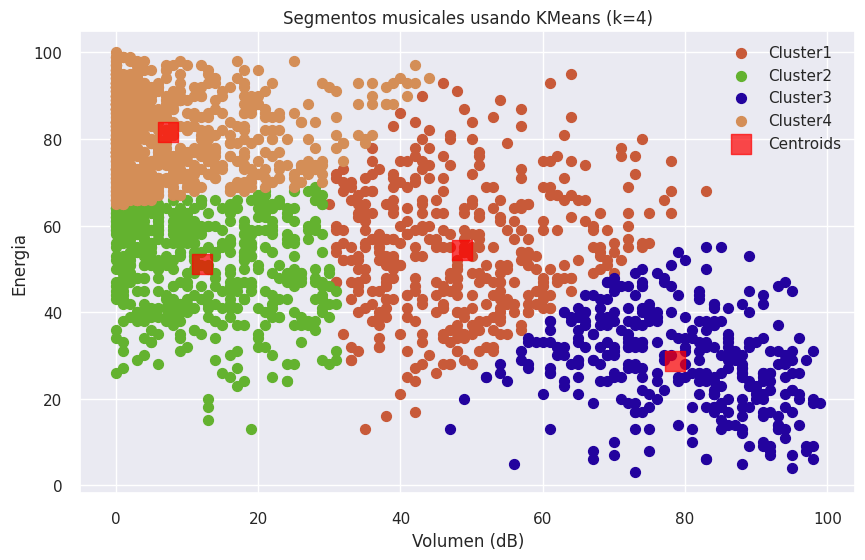

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10,6))
plt.scatter(segment_DF[segment_DF.segment==0]['Acousticness'],segment_DF[segment_DF.segment==0]['Energy'],s=50, c='#c85a39',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['Acousticness'],segment_DF[segment_DF.segment==1]['Energy'],s=50, c='#63b22f',label='Cluster2')

plt.scatter(segment_DF[segment_DF.segment==2]['Acousticness'],segment_DF[segment_DF.segment==2]['Energy'],s=50, c='#23039e',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==3]['Acousticness'],segment_DF[segment_DF.segment==3]['Energy'],s=50, c='#d48e57',label='Cluster4')

plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')


plt.title('Segmentos musicales usando KMeans (k=4)')

plt.xlabel('Volumen (dB)')

plt.ylabel('Energia')

plt.legend()

plt.show()

# Fuzzy C-Means

In [170]:
# Realizamos la instalación del paquete skfuzzy de la librería scikit, el cual
# usaremos para ejecutar el algoritmo fuzzy C-means.
!pip3 install scikit-fuzzy

In [171]:
from skfuzzy.cluster import cmeans

K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

cntr, u, u0, d, jm, p, fpc = cmeans(genre_normalized.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - cntr: Centroides
# - u: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración
# - jm: Historico del valor de la función objetivo
# - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

In [172]:
# Como solo estamos interesados en los centroides y la matriz de pertenencia
# podemos descartar el resto de valores de salida:
centroides, U, _, _, _, _, _ = cmeans(genre_normalized.T, K, m, tolerancia, maxiter, seed=100)

In [173]:
# Mostramos la matriz de pertenencia
with np.printoptions(threshold=False):
    print(U)

[[0.77168085 0.89013959 0.1735678  ... 0.76704607 0.25793795 0.80800963]
 [0.22831915 0.10986041 0.8264322  ... 0.23295393 0.74206205 0.19199037]]


In [174]:
# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los índices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

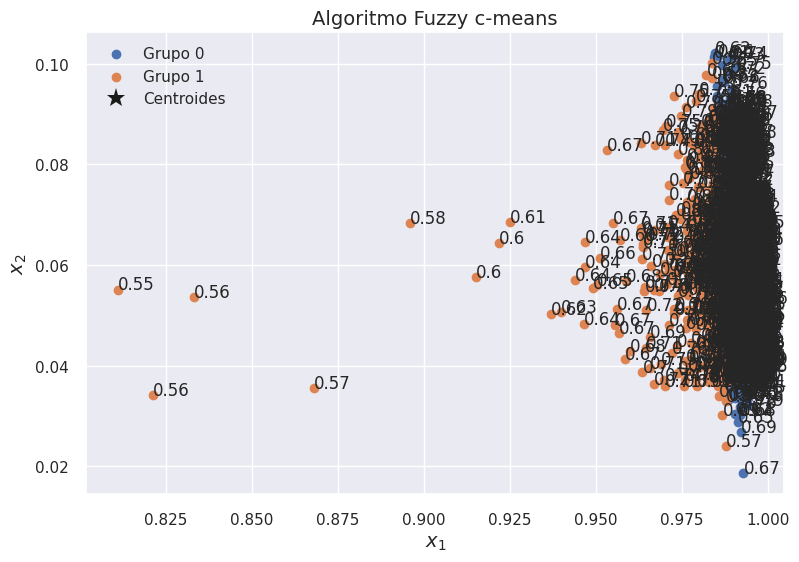

In [190]:
## Representación gráfica de la solución
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Representar las observaciones asociadas con cada grupo (cluster)
for k in range(0, K):
  plt.scatter(genre_normalized[grupos==k, 0], genre_normalized[grupos==k, 1], label="Grupo {}".format(k)) 

# Representar junto a cada observación el grado de pertenencia al grupo
for i, maxU_i in enumerate(np.round(maxU, 2)):
  plt.annotate(maxU_i, (genre_normalized[i,0], genre_normalized[i,1]))

plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides") # Dibujamos los centroides

plt.title("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

[[ 0.98957954  0.06034934  0.03283935  0.02812508 -0.00410273  0.00919131
   0.02942551  0.1092067   0.01055229  0.00259253  0.02988181]
 [ 0.98555342  0.05949358  0.03081342  0.02612774 -0.00432287  0.00943705
   0.0225559   0.14263701  0.01139077  0.00236514  0.02992242]
 [ 0.97015619  0.05899049  0.02965214  0.02309242 -0.00472581  0.00929854
   0.01932987  0.22174721  0.01138016  0.00247158  0.02804045]
 [ 0.98942856  0.05822474  0.02527152  0.02602636 -0.00483947  0.00892907
   0.02264181  0.11321822  0.02104391  0.0023295   0.02926577]]


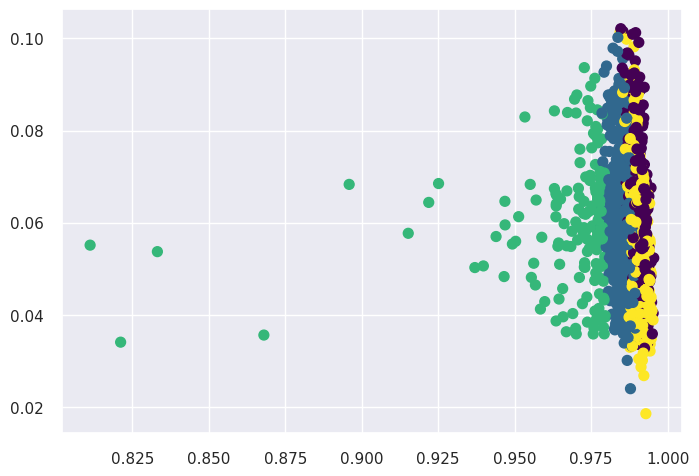

In [191]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Aplicar Fuzzy C-means
n_clusters = 4
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(genre_normalized.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Obtener los clústeres a los que pertenece cada punto
clusters = np.argmax(u, axis=0)

# Imprimir los centroides de los clústeres
print(cntr)

# Visualizar los datos
plt.scatter(genre_normalized[:, 0], genre_normalized[:, 1], c=clusters, s=50, cmap='viridis')
plt.show()

# DBSCAN

In [193]:
from sklearn.cluster import DBSCAN
import numpy

minPts = 3
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(genre_normalized)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 1


In [194]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels

array([0, 0, 0, ..., 0, 0, 0])

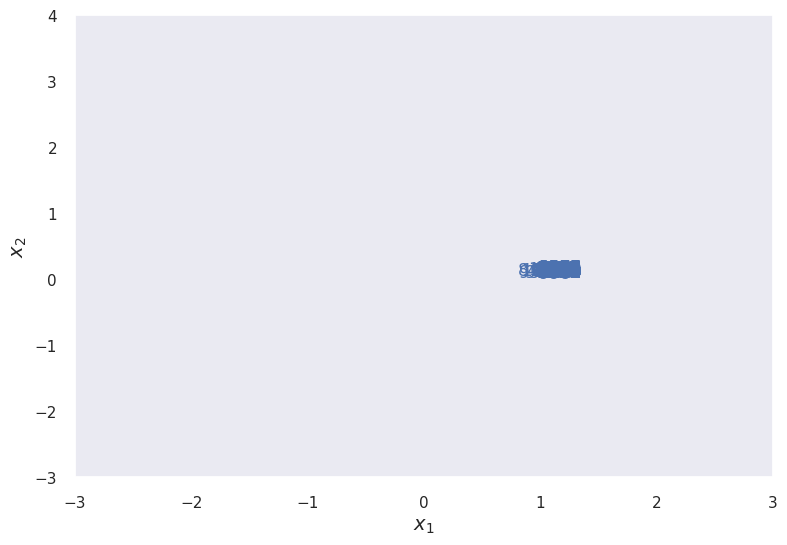

In [196]:
# Representación gráfica de la solución
# He comentado el código original que es susceptible de mejora
import numpy
#colors = numpy.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = numpy.hstack([colors] * 20)
#numbers = numpy.arange(len(X))
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(genre_normalized)):
    #plt.text(X[i][0], X[i][1], numbers[i], color=colors[labels[i]]) 
    plt.text(genre_normalized[i][0], genre_normalized[i][1], i, color=colors[labels[i]]) 
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.show()
# Observar que el dato 40 lo identifica como un outlier

In [197]:
from sklearn.cluster import DBSCAN

# Creamos el objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Entrenamos el modelo
dbscan.fit(genre_normalized)

# Obtenemos las etiquetas de los clusters
labels = dbscan.labels_

# Imprimimos el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"El número de clusters encontrados es: {n_clusters}")

El número de clusters encontrados es: 1


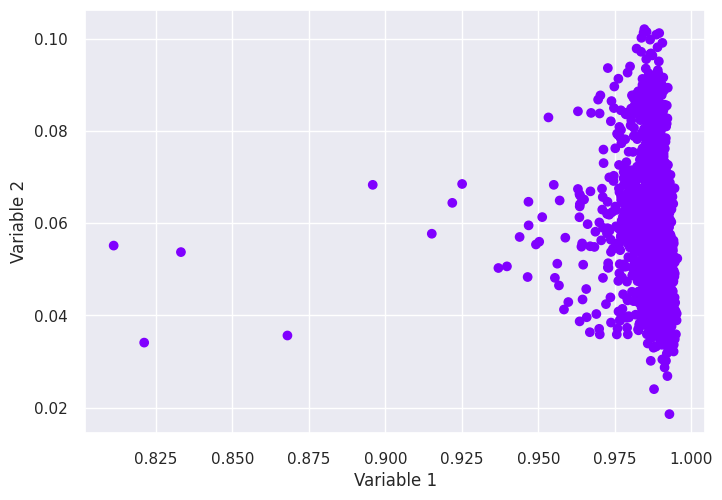

In [198]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(genre_normalized)

# Crear gráfico de dispersión
plt.scatter(genre_normalized[:,0], genre_normalized[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

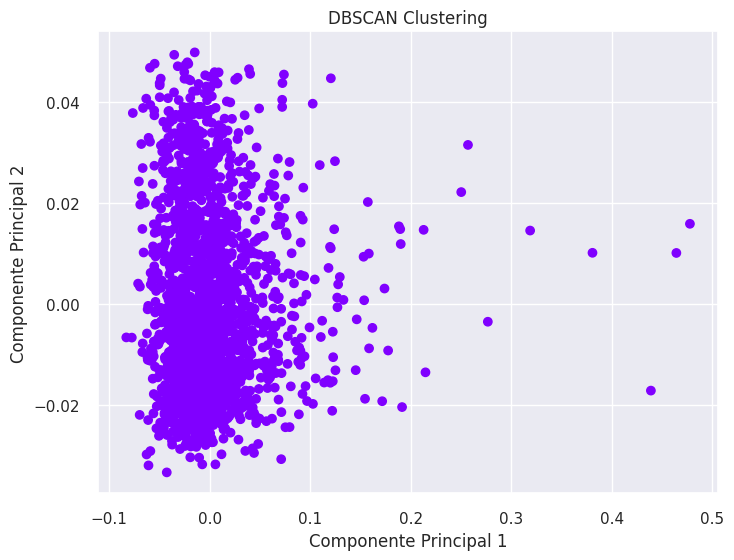

In [199]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(genre_normalized)

# Definir el modelo de clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Entrenar el modelo y obtener las etiquetas de los clusters
labels = dbscan.fit_predict(X_pca)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('DBSCAN Clustering')
plt.show()

# Algoritmos Jerárquicos

In [200]:
# Escalamos del 0 al 1
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.76190476, 0.71005917, 0.27835052, ..., 0.94949495, 0.01886792,
        0.6741573 ],
       [0.6984127 , 0.57988166, 0.78350515, ..., 0.17171717, 0.09433962,
        0.31460674],
       [0.71428571, 0.77514793, 0.68041237, ..., 0.02020202, 0.28301887,
        0.65168539],
       ...,
       [0.04761905, 0.77514793, 0.79381443, ..., 0.74747475, 0.09433962,
        0.70786517],
       [0.04761905, 0.81065089, 0.2371134 , ..., 0.54545455, 0.03773585,
        0.60674157],
       [0.04761905, 0.56804734, 0.48453608, ..., 0.74747475, 0.01886792,
        0.50561798]])

In [201]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_) 

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=X.columns)

[0.34264392 0.19323004]


,PC-1,PC-2
Year,-0.135519,-0.703571
Beats Per Minute (BPM),-0.070566,-0.026751
Energy,-0.530953,-0.047748
Danceability,-0.156961,0.229181
Loudness (dB),-0.250725,-0.158385
Liveness,-0.054622,-0.028107
Valence,-0.382425,0.615415
Length (Duration),0.002646,-0.032240
Acousticness,0.672896,0.170786
Speechiness,-0.041245,0.004278


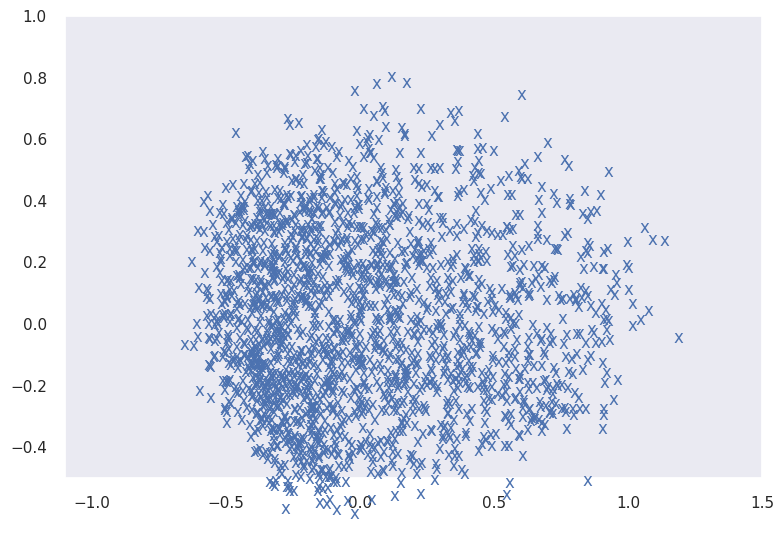

In [202]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")  
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()

/home/manolo/Escritorio/Estudios/Estudios/IA Big Data/Programación de Inteligencia Artificial/generos_musicales/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


Distancia Media	   0.88


/tmp/ipykernel_104586/1416280353.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


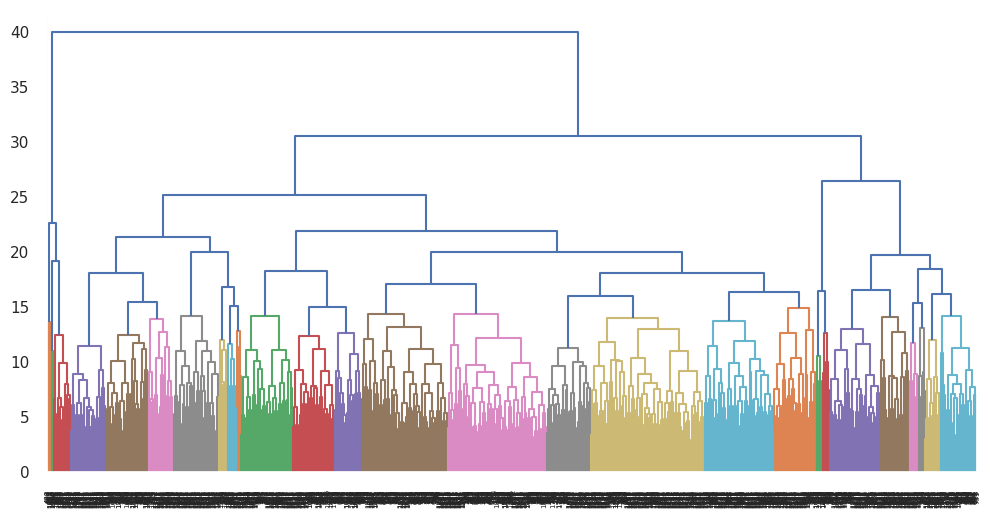

In [203]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(X_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma	
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=15)
plt.show()

# Para más información consultar:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [204]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 27


array([22, 17, 15, ..., 10, 23, 23], dtype=int32)

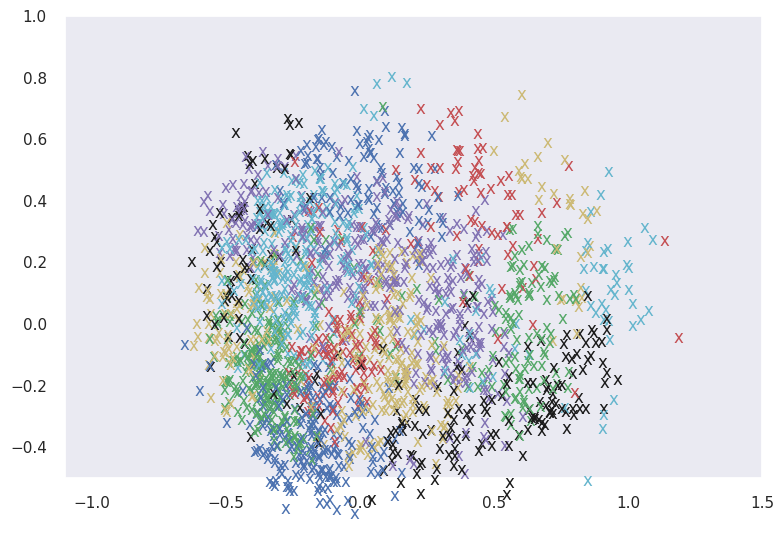

In [207]:
# Modifico el original y pongo comentadas las líneas a mejorar
colores = 'bgrcmyk'
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i] % len(colores)])
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()


# DPC

In [208]:
# Realizamos la instalación del paquete pydpc, el cual usaremos para ejecutar
# el algoritmo DPC. Más información en: https://pypi.org/project/pydpc/
!pip3 install pydpc

  Using cached pydpc-0.1.3-cp310-cp310-linux_x86_64.whl


In [211]:
X_scaled = np.ascontiguousarray(X)

In [213]:
X_scaled = X_scaled.astype('float')

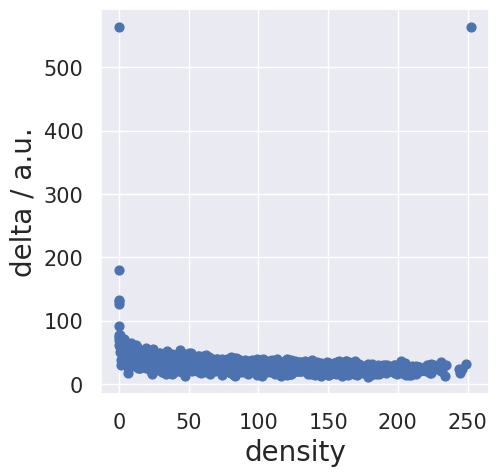

In [214]:
import pydpc

# Primero inicializamos el algoritmo, lo que calcula las densidades y la 
# distancia mínima entre puntos. Este método también dibuja el grafo de decisión.
clu = pydpc.Cluster(X_scaled)

In [1]:
# Definimos los valores rho y delta que nos permiten elegir los centros
rho = bool(1)
delta = bool(1.5)
clu.assign(rho, delta)


NameError: name 'clu' is not defined

In [2]:
# Obtenemos que datos de X serán los centros de los clusters
cluster_centers = clu.clusters
cluster_centers

NameError: name 'clu' is not defined

In [ ]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels = clu.membership
labels

In [ ]:
# Representación gráfica de la solución
import numpy

colors = 'bgk'
while len(colors) < max(labels) + 1:
    colors += colors

plt.figure(figsize=(9, 6))
for i in range(len(X_scaled)):
    if i in cluster_centers:
        plt.text(X_scaled[i][0], X_scaled[i][1], i, color=colors[labels[i]], weight='bold', fontsize=16)
    else:
        plt.text(X_scaled[i][0], X_scaled[i][1], i, color=colors[labels[i]])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.savefig('DPC.png')


In [ ]:
import numpy as np
import pydpc
import matplotlib.pyplot as plt


# Inicializar el algoritmo DPC
clu = pydpc.Cluster(X_scaled)

# Calcular las densidades y la distancia mínima entre puntos
clu.process()

# Asignar las muestras a sus correspondientes clusters
labels = clu.get_labels()

# Encontrar los centros de los clusters
cluster_centers = clu.get_centers()

# Reducir la dimensionalidad a dos dimensiones para poder visualizar los clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Representación gráfica de los clusters encontrados por DPC
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    if i in cluster_centers: # Centros de los clusters (en negrita)
        plt.text(X_pca[i][0], X_pca[i][1], i, color=colors[labels[i]], weight='bold', fontsize=16)
    else: # Resto de datos
        plt.text(X_pca[i][0], X_pca[i][1], i, color=colors[labels[i]]) 
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)  
plt.grid()
plt.show()
